## Analysis Function 1

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
class BlackBox:
    """
    This class implements a simple interface to the black-box service for the ODM course.
    """

    def __init__(self, token: int, endpoint: str = 'http://ls-stat-ml.uni-muenster.de:7300/'):
        self.endpoint = endpoint
        self.token = token

    def set_endpoint(self, endpoint: str):
        self.endpoint = endpoint

    def evaluate(self, objective: str, parameters: list) -> float:
        r = requests.post(url=self.endpoint + "compute/" + objective,
                          json={"parameters": [str(v) for v in parameters], "token": self.token})
        return float(r.json())

    def evaluate_gradient(self, objective: str, parameters: list) -> list:
        r = requests.post(url=self.endpoint + "compute_gradient/" + objective,
                          json={"parameters": [str(v) for v in parameters], "token": self.token})
        return r.json()

In [3]:
group_number = 11
bb = BlackBox(token = group_number)

In [4]:
x0 = [-2, -2]  # Starting point
current_function = "Function1"
np.set_printoptions(suppress=True, precision=20)

In [5]:
def create_grid(x_range, y_range, resolution):
    """Create a grid for visualization."""
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    return X, Y

def evaluate_on_grid(bb, objective, X, Y):
    """Evaluate the objective function on a grid."""
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = bb.evaluate(objective, [X[i, j], Y[i, j]])
    return Z

Evaluating Function1...


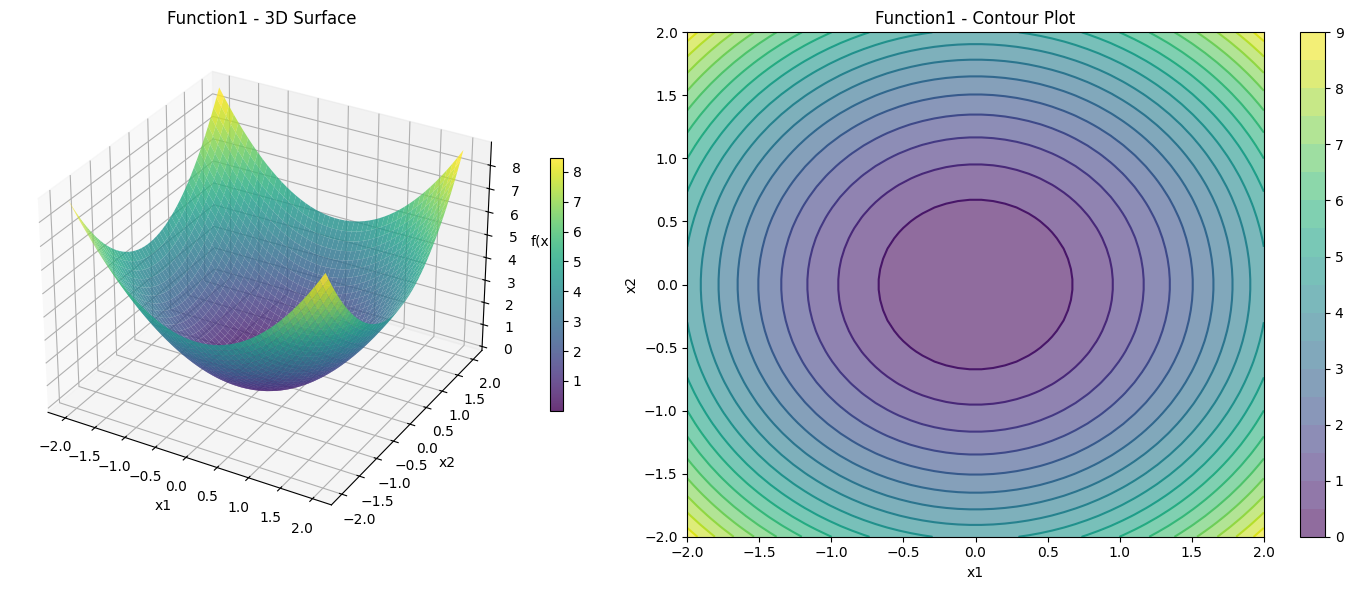

In [6]:
x_range = (-2, 2)
y_range = (-2, 2)
resolution = 50

# Create grid
X, Y = create_grid(x_range, y_range, resolution)

# Evaluate function on grid
print(f"Evaluating {current_function}...")
Z = evaluate_on_grid(bb, current_function, X, Y)

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D surface plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8, antialiased=True)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x)')
ax1.set_title(f'{current_function} - 3D Surface')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
contourf = ax2.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title(f'{current_function} - Contour Plot')
fig.colorbar(contourf, ax=ax2)

plt.tight_layout()
plt.show()